# **Dimension Reduction Tecniques**
Dimensionality reduction is the mapping of data from a high dimensional space to a lower dimension space such that the result obtained by analyzing the reduced dataset is a good approximation to the result obtained by analyzing the original data set.
<img src="dimensionality_reduction.jpeg" alt="Alt Text" width="800" style="display: block; margin: 0 auto;"/>



## **1. Principal Component Analysis (PCA) - Example**
Reduce the dimension i.e suppose we have 50 input features and i want to include all these features so we dimension reduction to combine all features in to 3 or 4 components like PC1,PC2 and Pc3 etc.

## **Dataset**

Consider a dataset with two features:

$$
X = \begin{bmatrix}
2 & 3 \\
3 & 5 \\
4 & 4 \\
5 & 6 \\
\end{bmatrix}
$$

## **Mean Centering**

Calculate the mean of each feature:

- Mean of Feature 1: 
$$ \frac{2 + 3 + 4 + 5}{4} = 3.5 $$

- Mean of Feature 2: 
$$ \frac{3 + 5 + 4 + 6}{4} = 4.5 $$

Subtract the means from each feature:

$$
X_{\text{centered}} =
\begin{bmatrix}
2 - 3.5 & 3 - 4.5 \\
3 - 3.5 & 5 - 4.5 \\
4 - 3.5 & 4 - 4.5 \\
5 - 3.5 & 6 - 4.5 \\
\end{bmatrix}
=
\begin{bmatrix}
-1.5 & -1.5 \\
-0.5 & 0.5 \\
0.5 & -0.5 \\
1.5 & 1.5 \\
\end{bmatrix}
$$

## **Covariance Matrix**

Compute the covariance matrix \( C \):

$$
C = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
$$

Where \( n \) is the number of samples.

$$
X_{\text{centered}}^T X_{\text{centered}} =
\begin{bmatrix}
-1.5 & -0.5 & 0.5 & 1.5 \\
-1.5 & 0.5 & -0.5 & 1.5
\end{bmatrix}
\begin{bmatrix}
-1.5 & -0.5 & 0.5 & 1.5 \\
-1.5 & 0.5 & -0.5 & 1.5
\end{bmatrix}
=
\begin{bmatrix}
5.0 & 5.0 \\
5.0 & 5.0
\end{bmatrix}
$$

$$
C = \frac{1}{4-1} \begin{bmatrix}
5.0 & 5.0 \\
5.0 & 5.0
\end{bmatrix}
=
\begin{bmatrix}
\frac{5.0}{3} & \frac{5.0}{3} \\
\frac{5.0}{3} & \frac{5.0}{3}
\end{bmatrix}
=
\begin{bmatrix}
1.67 & 1.67 \\
1.67 & 1.67
\end{bmatrix}
$$

## **Eigen Decomposition**

Solve for eigenvalues \( \lambda \) and eigenvectors \( v \):

$$
C - \lambda I = 0
$$

Eigenvalues of \( C \):

- \( \lambda_1 = 3.33 \)
- \( \lambda_2 = 0 \)

Eigenvectors corresponding to these eigenvalues are:

- For \( \lambda_1 \):
$$
v_1 = \frac{1}{\sqrt{2}} \begin{bmatrix}
1 \\
1
\end{bmatrix}
$$

- For \( \lambda_2 \):
$$
v_2 = \frac{1}{\sqrt{2}} \begin{bmatrix}
-1 \\
1
\end{bmatrix}
$$

## **Transformation**

Project the centered data onto the principal components:

$$
X_{\text{transformed}} = X_{\text{centered}} \times v
$$

Using the first eigenvector \( v_1 \):

$$
X_{\text{transformed}} =
\begin{bmatrix}
-1.5 & -1.5 \\
-0.5 & 0.5 \\
0.5 & -0.5 \\
1.5 & 1.5
\end{bmatrix}
\times
\frac{1}{\sqrt{2}} \begin{bmatrix}
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
-2.12 \\
0 \\
0 \\
2.12
\end{bmatrix}
$$

## **Summary**

1. **Center Data:** Adjust data to have zero mean.
2. **Covariance Matrix:** Measure feature variance and correlations.
3. **Eigen Decomposition:** Identify principal components.
4. **Transform Data:** Project onto the principal components.


# **Practical Demonstartion with buitin Dataset** 
In essence, scikit-learn abstracts away the detailed mathematical computations, making PCA easy to apply with just a few lines of code.

In [58]:
from sklearn.datasets import load_digits
import pandas as pd
dataset = load_digits()

### **Understanding Dataset Structure with dataset keys**
dataset.keys() lists the available attributes of the dataset object, showing what information it contains. It helps you understand the structure and contents of the dataset. Each key corresponds to a specific part of the data.

In [59]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

### **Interpreting Dataset Dimensions with dataset.data.shape**
dataset.data.shape returns the dimensions of the feature data in the dataset. It provides a tuple where the first value represents the number of samples (rows) and the second value represents the number of features (columns) for each sample. For the digits dataset, it typically shows (1797, 64), meaning 1,797 samples with 64 features each.

In [60]:
dataset.data.shape

(1797, 64)

### **Accessing Feature Values of the First Sample**
dataset.data[0] returns the feature values of the first sample in the dataset. For the digits dataset, this is a 1D array of 64 values, representing the pixel intensities of the first 8x8 image, flattened into a single array.

In [61]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### **Visualizing the First Sample**
dataset.data[0].reshape(8, 8) reshapes the first sample's feature values back into an 8x8 array. For the digits dataset, this converts the flattened pixel intensities of the first image back into its original 8x8 pixel grid format, making it easier to visualize as an image.

In [62]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### **Visualizing the First Sample as an Image**
plt.matshow(dataset.data[0].reshape(8, 8), cmap='viridis') reshapes the first sample's data back into an 8x8 grid and visualizes it as a matrix plot using the 'viridis' color map. This provides a colorful representation of the image's pixel intensities.

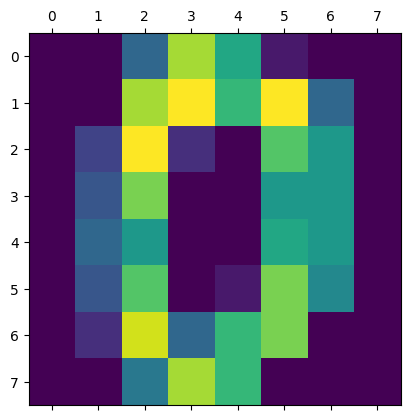

In [63]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.matshow(dataset.data[0].reshape(8, 8), cmap='viridis')
plt.show()

### **Visualizing the 10th Sample**
plt.matshow(dataset.data[9].reshape(8, 8), cmap='viridis') reshapes the 10th sample's data into an 8x8 grid and visualizes it as a matrix plot using the 'viridis' color map. This displays the pixel intensities of the 10th digit image with the 'viridis' color scheme.

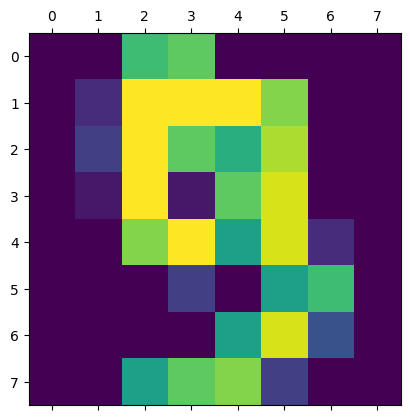

In [64]:
plt.matshow(dataset.data[9].reshape(8,8),cmap = 'viridis')

dataset.target[:5] retrieves the first five target labels from the dataset. This provides a quick look at the class labels for the first five samples, which in the case of the digits dataset, represents the digit each of these samples corresponds to.

In [65]:
dataset.target[:5]

array([0, 1, 2, 3, 4])

### **Creating and Previewing the DataFrame from Feature Data**
creates a Pandas DataFrame from the feature data in the dataset, with columns named according to dataset.feature_names. df.head() displays the first five rows of this DataFrame, providing a preview of the data in tabular form.

In [66]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


### **Understanding the Target Labels in the Dataset**
dataset.target is an array containing the target labels for each sample in the dataset. In the context of the digits dataset, it holds the digit values (0-9) corresponding to each image. This array allows you to know which digit each image represents.

In [67]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [68]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


### **Spliting Target and Features**
X = df: Assigns the DataFrame df (which contains the feature data) to the variable X. This represents the input features for each sample.

y = dataset.target: Assigns the target labels from dataset.target to the variable y. This represents the output labels (or classes) corresponding to each sample.

In [69]:
X = df
y = dataset.target

### **Standarization**
X_scaled contains the standardized version of X, where each feature has been scaled to have a mean of 0 and a standard deviation of 1. This process helps ensure that all features contribute equally to the analysis or model.

In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

### **Splitting Dataset**
splits the scaled dataset into training and test sets, using 80% of the data for training and 20% for testing, with a fixed random seed for reproducibility.

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

### **Ecaluation of Logestic Regression**
code will provide you with a comprehensive evaluation of logistic regression model, including accuracy, detailed classification metrics, and a visual representation of classification performance.

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      0.93      0.97        46
           2       0.98      1.00      0.99        41
           3       0.93      0.96      0.94        26
           4       1.00      0.94      0.97        35
           5       1.00      0.95      0.97        38
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        32
           8       0.94      0.97      0.96        35
           9       0.85      0.97      0.91        30

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



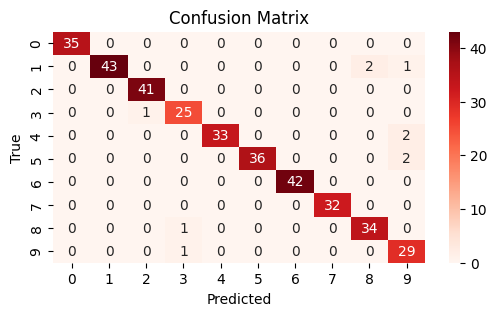

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns



model = LogisticRegression(max_iter=100)  
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### **Use PCA to reduce dimensions**

X refers to the DataFrame or array containing the feature data for each sample. In the context of your previous code, X is derived from the df DataFrame, which contains the feature data of the digits dataset.

In [73]:
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


### **Use components such that 95% of variance is retained**
The code uses PCA to reduce the dimensionality of the dataset X such that 95% of the original variance is retained. The shape of X_pca will show how many principal components were needed to achieve this level of variance retention.

In [74]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

Returns an array where each element represents the fraction of the total variance explained by each of the selected principal components.

In [75]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

Returns the number of principal components that were selected based on the PCA initialization. When you set PCA(0.95), it automatically determines how many components are needed to retain 95% of the variance.

In [76]:
pca.n_components_

np.int64(29)

### **PCA created 29 components out of 64 original columns**
After applying PCA, the data is transformed into a new feature space with 29 components, significantly reducing its dimensionality from the original 64 features while retaining 95% of the data's variance.


In [77]:
X_pca

array([[ -1.25946645, -21.27488348,   9.46305462, ...,   3.67072108,
          0.9436689 ,   1.13250195],
       [  7.9576113 ,  20.76869896,  -4.43950604, ...,   2.18261819,
          0.51022719,  -2.31354911],
       [  6.99192297,   9.95598641,  -2.95855808, ...,   4.22882114,
         -2.1576573 ,  -0.8379578 ],
       ...,
       [ 10.8012837 ,   6.96025223,  -5.59955453, ...,  -3.56866194,
         -1.82444444,  -3.53885886],
       [ -4.87210009, -12.42395362,  10.17086635, ...,   3.25330054,
         -0.95484174,   0.93895602],
       [ -0.34438963,  -6.36554919, -10.77370849, ...,  -3.01636722,
         -1.29752723,  -2.58810313]])

The code splits the PCA-transformed feature data (X_pca) and the target labels (y) into training and testing sets, using 80% of the data for training and 20% for testing, with a fixed random seed for consistent results.

In [78]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

### **Evaluation of Logestic Regression with PCA**

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.98      0.91      0.94        46
           2       0.98      1.00      0.99        41
           3       0.96      0.92      0.94        26
           4       1.00      0.94      0.97        35
           5       1.00      0.95      0.97        38
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        32
           8       0.92      1.00      0.96        35
           9       0.88      0.97      0.92        30

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



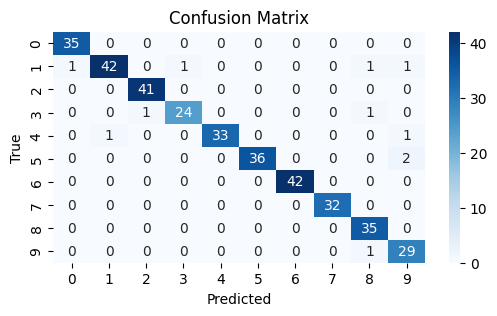

In [79]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

accuracy = model.score(X_test_pca, y_test)
print(f"Accuracy: {accuracy:.2f}")

y_pred = model.predict(X_test_pca)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **2. Linear Discriminant Analysis (LDA) - Example**
Reduce the dimensionality while considering class separability. Suppose we have a dataset with several features, and we want to reduce them to a few discriminant components that maximize class separation.

## **Dataset**

Consider a dataset with two features and three classes:

$$
X = \begin{bmatrix}
2 & 3 \\
3 & 5 \\
4 & 4 \\
5 & 6 \\
\end{bmatrix}
$$

## **Mean of Each Class**

Calculate the mean of each feature for each class:

- Class 1: Mean of Feature 1: 
$$ \frac{2 + 3}{2} = 2.5 $$
  Mean of Feature 2: 
$$ \frac{3 + 5}{2} = 4 $$
  
- Class 2: Mean of Feature 1: 
$$ \frac{4}{1} = 4 $$
  Mean of Feature 2: 
$$ \frac{4}{1} = 4 $$

- Class 3: Mean of Feature 1: 
$$ \frac{5}{1} = 5 $$
  Mean of Feature 2: 
$$ \frac{6}{1} = 6 $$

## **Within-Class Scatter Matrix**

Calculate the within-class scatter matrix \( S_W \):

$$
S_W = \sum_{i=1}^{c} \sum_{x \in C_i} (x - \mu_i)(x - \mu_i)^T
$$

Where \( c \) is the number of classes and \( \mu_i \) is the mean vector of class \( i \).

$$
S_W = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$$

## **Between-Class Scatter Matrix**

Calculate the between-class scatter matrix \( S_B \):

$$
S_B = \sum_{i=1}^{c} n_i (\mu_i - \mu)(\mu_i - \mu)^T
$$

Where \( n_i \) is the number of samples in class \( i \) and \( \mu \) is the overall mean.

$$
S_B = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$$

## **Eigen Decomposition**

Solve the generalized eigenvalue problem for \( S_W^{-1} S_B \):

$$
S_W^{-1} S_B v = \lambda v
$$

Eigenvalues and eigenvectors of \( S_W^{-1} S_B \) are:

- Eigenvalues: \( \lambda_1 = 3 \), \( \lambda_2 = 0 \)
- Eigenvectors corresponding to these eigenvalues are:

  - For \( \lambda_1 \):
$$
v_1 = \begin{bmatrix}
0.7 \\
0.7
\end{bmatrix}
$$

  - For \( \lambda_2 \):
$$
v_2 = \begin{bmatrix}
-0.7 \\
0.7
\end{bmatrix}
$$

## **Transformation**

Project the data onto the discriminant components:

$$
X_{\text{transformed}} = X \times v
$$

Using the first eigenvector \( v_1 \):

$$
X_{\text{transformed}} =
\begin{bmatrix}
2 & 3 \\
3 & 5 \\
4 & 4 \\
5 & 6
\end{bmatrix}
\times
\begin{bmatrix}
0.7 \\
0.7
\end{bmatrix}
=
\begin{bmatrix}
3.5 \\
5.6 \\
5.0 \\
6.8
\end{bmatrix}
$$

## **Summary**

1. **Calculate Class Means:** Determine the mean feature values for each class.
2. **Scatter Matrices:** Compute within-class and between-class scatter matrices.
3. **Eigen Decomposition:** Solve for eigenvalues and eigenvectors to find discriminant components.
4. **Transform Data:** Project data onto the discriminant components for reduced dimensionality with class separation.


# **Practical Demonstration**

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      0.91      0.94        46
           2       0.95      0.98      0.96        41
           3       0.93      0.96      0.94        26
           4       1.00      0.97      0.99        35
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.98        32
           8       0.89      0.94      0.92        35
           9       0.94      0.97      0.95        30

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



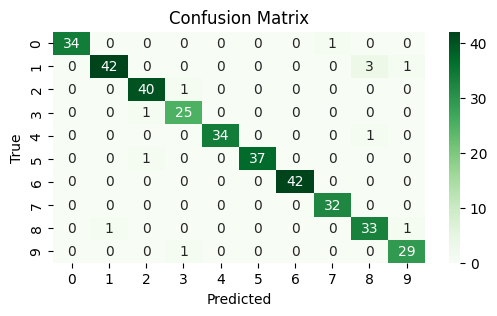

In [80]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=9)  # n_components = number of classes - 1
X_lda = lda.fit_transform(X_scaled, y)

X_train_lda, X_test_lda, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_lda, y_train)

accuracy = model.score(X_test_lda, y_test)
print(f"Accuracy: {accuracy:.2f}")

y_pred = model.predict(X_test_lda)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **3. t-Distributed Stochastic Neighbor Embedding (t-SNE) - Example**

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique used for visualizing high-dimensional data in lower-dimensional spaces. It aims to preserve the local structure of the data while revealing clusters or patterns in a reduced dimensional space.

## **Dataset**

Consider a small high-dimensional dataset with four features and three data points:

$$
X = \begin{bmatrix}
1.0 & 0.5 & 0.3 & 2.0 \\
2.0 & 1.5 & 0.8 & 3.5 \\
3.0 & 2.0 & 1.0 & 4.0 \\
\end{bmatrix}
$$

## **Compute Pairwise Similarities**

Calculate the pairwise similarities between data points in the high-dimensional space using a Gaussian kernel. For simplicity, we'll use a fixed value for \( \sigma \) (e.g., 1.0).

1. Compute pairwise Euclidean distances:
   
   \[
   d_{12} = \sqrt{(1.0 - 2.0)^2 + (0.5 - 1.5)^2 + (0.3 - 0.8)^2 + (2.0 - 3.5)^2} \approx 1.80
   \]

   \[
   d_{13} = \sqrt{(1.0 - 3.0)^2 + (0.5 - 2.0)^2 + (0.3 - 1.0)^2 + (2.0 - 4.0)^2} \approx 2.76
   \]

   \[
   d_{23} = \sqrt{(2.0 - 3.0)^2 + (1.5 - 2.0)^2 + (0.8 - 1.0)^2 + (3.5 - 4.0)^2} \approx 1.25
   \]

2. Compute pairwise similarities using the Gaussian kernel:

   \[
   P_{12} = \frac{\exp(-d_{12}^2 / 2\sigma^2)}{\sum_{k \neq 1} \exp(-d_{1k}^2 / 2\sigma^2)}
   \]

   \[
   P_{12} = \frac{\exp(-1.80^2 / 2 \times 1.0^2)}{\exp(-1.80^2 / 2) + \exp(-2.76^2 / 2)} \approx 0.36
   \]

   \[
   P_{13} = \frac{\exp(-2.76^2 / 2)}{\exp(-1.80^2 / 2) + \exp(-2.76^2 / 2)} \approx 0.21
   \]

   \[
   P_{23} = \frac{\exp(-1.25^2 / 2)}{\exp(-1.80^2 / 2) + \exp(-2.76^2 / 2)} \approx 0.43
   \]

## **Compute Low-Dimensional Similarities**

After embedding the data into 2D space, compute the pairwise similarities using a Student’s t-distribution with one degree of freedom:

1. Assume we obtain the following 2D coordinates after embedding:

   $$
   Y = \begin{bmatrix}
   0.5 & 0.2 \\
   1.5 & 1.2 \\
   2.0 & 0.8 \\
   \end{bmatrix}
   $$

2. Compute pairwise distances in the 2D space and similarities:

   \[
   d_{12}^2 = (0.5 - 1.5)^2 + (0.2 - 1.2)^2 \approx 1.82
   \]

   \[
   d_{13}^2 = (0.5 - 2.0)^2 + (0.2 - 0.8)^2 \approx 2.58
   \]

   \[
   d_{23}^2 = (1.5 - 2.0)^2 + (1.2 - 0.8)^2 \approx 0.52
   \]

   \[
   Q_{12} = \frac{(1 + d_{12}^2)^{-1}}{\sum_{k \neq 1} (1 + d_{1k}^2)^{-1}} \approx 0.42
   \]

   \[
   Q_{13} = \frac{(1 + d_{13}^2)^{-1}}{\sum_{k \neq 1} (1 + d_{1k}^2)^{-1}} \approx 0.20
   \]

   \[
   Q_{23} = \frac{(1 + d_{23}^2)^{-1}}{\sum_{k \neq 1} (1 + d_{1k}^2)^{-1}} \approx 0.38
   \]

## **Minimize the Kullback-Leibler Divergence**

Optimize the 2D coordinates to minimize the KL divergence between high-dimensional similarities \( P \) and low-dimensional similarities \( Q \):

$$
\text{KL}(P \| Q) = \sum_{i} \sum_{j} P_{ij} \log \frac{P_{ij}}{Q_{ij}}
$$

## **Summary**

1. **Compute Pairwise Similarities:** Calculate the pairwise similarities between data points in the high-dimensional space using a Gaussian kernel.
2. **Compute Low-Dimensional Similarities:** Calculate the similarities in the low-dimensional space using a Student’s t-distribution.
3. **Minimize KL Divergence:** Optimize the layout of data points in the low-dimensional space to minimize the KL divergence between high-dimensional and low-dimensional similarities.
4. **Visualize Results:** Use the transformed low-dimensional data for visualization to reveal patterns and clusters.



# **Practical Demonstration**

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.98      0.89      0.93        46
           2       0.91      1.00      0.95        41
           3       0.76      0.73      0.75        26
           4       1.00      0.94      0.97        35
           5       0.95      0.97      0.96        38
           6       1.00      1.00      1.00        42
           7       1.00      0.97      0.98        32
           8       0.78      0.89      0.83        35
           9       0.79      0.73      0.76        30

    accuracy                           0.92       360
   macro avg       0.92      0.91      0.91       360
weighted avg       0.92      0.92      0.92       360



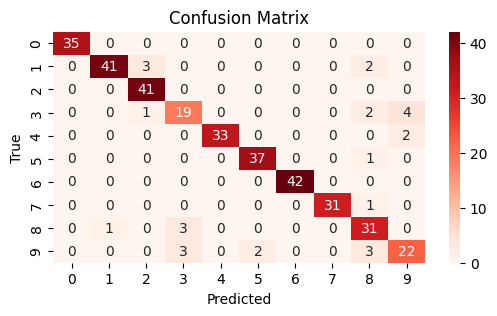

In [81]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=30)  # Reduce to 2 dimensions for visualization
X_tsne = tsne.fit_transform(X_scaled)

X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X_tsne, y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=2000)
model.fit(X_train_tsne, y_train)

accuracy = model.score(X_test_tsne, y_test)
print(f"Accuracy: {accuracy:.2f}")

y_pred = model.predict(X_test_tsne)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# **4. Independent Component Analysis (ICA) - Examples**


Independent Component Analysis (ICA) is a computational technique used to separate a multivariate signal into additive, independent components. It is particularly useful in scenarios where you have mixed signals and want to recover the original sources.

### **Example: Signal Separation**

Consider a dataset with mixed signals from two sources:

$$
X = \begin{bmatrix}
0.6 & 0.9 \\
0.2 & 1.0 \\
1.2 & 1.5 \\
0.7 & 1.2 \\
\end{bmatrix}
$$

The goal is to separate these mixed signals into their original independent sources.

1. **Generate Mixed Signals:**

   Suppose we have two original signals \( S_1 \) and \( S_2 \) mixed to form \( X \):

   $$
   S = \begin{bmatrix}
   1 & 2 \\
   1 & 3 \\
   2 & 1 \\
   1 & 2
   \end{bmatrix}
   $$

   The mixing matrix \( A \) is:

   $$
   A = \begin{bmatrix}
   0.5 & 1.5 \\
   0.7 & 1.2
   \end{bmatrix}
   $$

   So,

   $$
   X = S \cdot A
   $$

2. **Apply ICA:**

   Use ICA to separate \( X \) into independent components \( S \):

   - Estimate the unmixing matrix \( W \).
   - Compute the estimated sources \( \hat{S} \) using:

     $$
     \hat{S} = X \cdot W
     $$

3. **Result:**

   After applying ICA, you obtain:

   $$
   \hat{S} \approx \begin{bmatrix}
   1 & 2 \\
   1 & 3 \\
   2 & 1 \\
   1 & 2
   \end{bmatrix}
   $$

   These are the estimated independent components.


## **Summary**

 **ICA:**
   - **Generate Mixed Signals:** Mix original signals using a mixing matrix.
   - **Apply ICA:** Use ICA to estimate the unmixing matrix and recover the original sources.
   - **Result:** Obtain separated independent components.


# **Practical Demonstration**

ICA Accuracy: 0.96

ICA Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.96      0.93      0.95        46
           2       0.93      0.98      0.95        41
           3       0.93      0.96      0.94        26
           4       1.00      0.91      0.96        35
           5       1.00      0.95      0.97        38
           6       1.00      1.00      1.00        42
           7       0.94      1.00      0.97        32
           8       0.94      0.91      0.93        35
           9       0.88      0.97      0.92        30

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



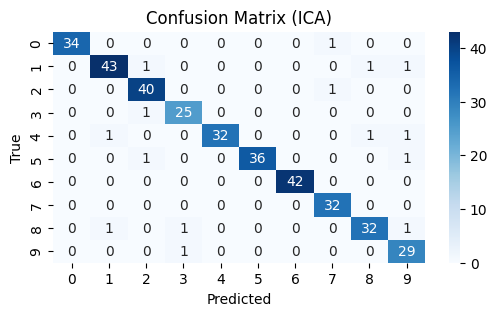

In [82]:
from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Independent Component Analysis (ICA)
ica = FastICA(n_components=40, random_state=42)
X_train_ica = ica.fit_transform(X_train)
X_test_ica = ica.transform(X_test)

model_ica = LogisticRegression(max_iter=2000, random_state=42)
model_ica.fit(X_train_ica, y_train)

y_pred_ica = model_ica.predict(X_test_ica)
accuracy_ica = accuracy_score(y_test, y_pred_ica)

print(f"ICA Accuracy: {accuracy_ica:.2f}")
print("\nICA Classification Report:")
print(classification_report(y_test, y_pred_ica))

conf_matrix_ica = confusion_matrix(y_test, y_pred_ica)

plt.figure(figsize=(6, 3))  # Adjust size as needed
sns.heatmap(conf_matrix_ica, annot=True, fmt='d', cmap='Blues', 
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (ICA)')
plt.show()


# **Feature Selection**

Feature selection techniques help in choosing the most relevant features for model building. Here we discuss two methods: SelectKBest and Recursive Feature Elimination (RFE).

## **1. SelectKBest**

SelectKBest selects the top \( k \) features based on a statistical test. It evaluates features based on their relationship with the target variable and retains the most relevant ones.

### **Example**

Consider a dataset with four features and a binary target variable. We will use a hypothetical dataset to illustrate how to select the top features using `SelectKBest`.

#### **Dataset**

Let's assume the following dataset:

| Feature 1 | Feature 2 | Feature 3 | Feature 4 | Target |
|-----------|-----------|-----------|-----------|--------|
| 1         | 5         | 3         | 8         | 0      |
| 2         | 6         | 4         | 9         | 1      |
| 3         | 7         | 5         | 10        | 0      |
| 4         | 8         | 6         | 11        | 1      |

We will use the Chi-Square test to evaluate the features.

#### **Steps**

1. **Calculate the Chi-Square Statistics:**

   The Chi-Square test evaluates the relationship between each feature and the target variable. For simplicity, let's use the following hypothetical Chi-Square scores for the features:

   | Feature  | Chi-Square Score |
   |----------|------------------|
   | Feature 1| 10.5             |
   | Feature 2| 20.0             |
   | Feature 3| 15.0             |
   | Feature 4| 5.0              |

2. **Select the Top \( k \) Features:**

   Suppose we want to select the top 2 features. We will rank the features based on their Chi-Square scores.

   - **Feature 2:** 20.0
   - **Feature 3:** 15.0
   - **Feature 1:** 10.5
   - **Feature 4:** 5.0

   The top 2 features are Feature 2 and Feature 3.

3. **Transform the Dataset:**

   Using SelectKBest with \( k = 2 \), we retain only the top 2 features:

   | Feature 2 | Feature 3 | Target |
   |-----------|-----------|--------|
   | 5         | 3         | 0      |
   | 6         | 4         | 1      |
   | 7         | 5         | 0      |
   | 8         | 6         | 1      |

### **Summary**

1. **Calculate Feature Scores:** Compute statistical scores (e.g., Chi-Square) for each feature relative to the target variable.
2. **Rank Features:** Rank features based on their scores.
3. **Select Top Features:** Choose the top \( k \) features based on the highest scores.
4. **Transform Data:** Use the selected features for model building and analysis.


# **Practical Demonstration**

SelectKBest Accuracy: 0.97

SelectKBest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      0.93      0.96        46
           2       1.00      1.00      1.00        41
           3       0.92      0.92      0.92        26
           4       1.00      0.97      0.99        35
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.98        32
           8       0.89      0.94      0.92        35
           9       0.94      0.97      0.95        30

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



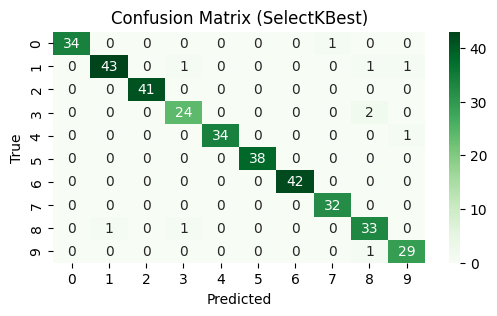

In [83]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression

selector_kbest = SelectKBest(mutual_info_classif, k=40)  # Select top 40 features
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
X_test_kbest = selector_kbest.transform(X_test)

model_kbest = LogisticRegression(max_iter=2000, random_state=42)
model_kbest.fit(X_train_kbest, y_train)

y_pred_kbest = model_kbest.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)

print(f"SelectKBest Accuracy: {accuracy_kbest:.2f}")
print("\nSelectKBest Classification Report:")
print(classification_report(y_test, y_pred_kbest))

conf_matrix_kbest = confusion_matrix(y_test, y_pred_kbest)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_kbest, annot=True, fmt='d', cmap='Greens', 
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SelectKBest)')
plt.show()



## **2. Recursive Feature Elimination (RFE)**

Recursive Feature Elimination (RFE) recursively removes features and builds models to determine which features contribute the most to the model. It starts with all features and systematically removes the least important ones based on model performance.

### **Example**

Consider a dataset with four features and a binary target variable. We will use a hypothetical dataset to illustrate how RFE works to select the most important features.

#### **Dataset**

Let's assume the following dataset:

| Feature 1 | Feature 2 | Feature 3 | Feature 4 | Target |
|-----------|-----------|-----------|-----------|--------|
| 1         | 5         | 3         | 8         | 0      |
| 2         | 6         | 4         | 9         | 1      |
| 3         | 7         | 5         | 10        | 0      |
| 4         | 8         | 6         | 11        | 1      |

#### **Steps**

1. **Initial Model Training:**

   Train a model (e.g., Logistic Regression) using all features.

   Suppose the model accuracy is 0.75.

2. **Evaluate Feature Importance:**

   Rank features based on their importance. Hypothetical feature importance scores could be:

   | Feature  | Importance Score |
   |----------|------------------|
   | Feature 1| 0.5              |
   | Feature 2| 0.3              |
   | Feature 3| 0.2              |
   | Feature 4| 0.1              |

3. **Remove Least Important Feature:**

   Remove the feature with the lowest importance score (Feature 4 in this case) and retrain the model.

   Suppose the new model accuracy is 0.78.

4. **Repeat the Process:**

   Continue removing the least important features and retrain the model at each step until the desired number of features is reached.

   For instance, if removing Feature 3 yields an accuracy of 0.80, then Feature 3 is the next to be removed.

5. **Final Feature Set:**

   The final set of features could be Feature 1 and Feature 2, with the highest model performance.

### **Summary**

1. **Train Initial Model:** Train a model using all features to evaluate performance.
2. **Evaluate Importance:** Determine feature importance based on model performance.
3. **Remove Least Important Features:** Systematically remove the least important features.
4. **Retrain Model:** Retrain the model after each removal and assess performance.
5. **Select Final Features:** Continue until the desired number of features is reached with optimal model performance.




RFE Accuracy: 0.97

RFE Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       1.00      0.91      0.95        46
           2       0.95      1.00      0.98        41
           3       0.89      0.92      0.91        26
           4       1.00      0.97      0.99        35
           5       1.00      0.95      0.97        38
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.98        32
           8       0.89      0.97      0.93        35
           9       0.94      0.97      0.95        30

    accuracy                           0.97       360
   macro avg       0.96      0.97      0.96       360
weighted avg       0.97      0.97      0.97       360



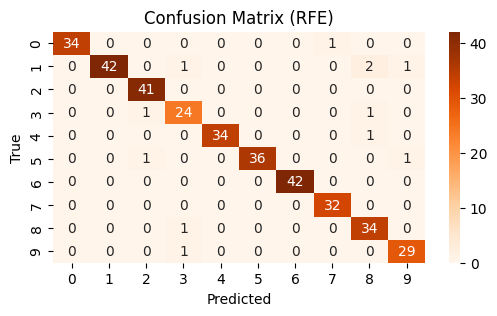

In [84]:
model_rfe = LogisticRegression(max_iter=2000, random_state=42)
selector_rfe = RFE(model_rfe, n_features_to_select=40, step=1)
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)

model_rfe = LogisticRegression(max_iter=2000, random_state=42)
model_rfe.fit(X_train_rfe, y_train)

y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

print(f"RFE Accuracy: {accuracy_rfe:.2f}")
print("\nRFE Classification Report:")
print(classification_report(y_test, y_pred_rfe))

conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix_rfe, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (RFE)')
plt.show()
